This assignment is made by Manlin Yang and Xiaojia He

Final proposal Link: https://github.com/mandy941/DAV-Data-Science/blob/master/final%20project/M_Yang_FinalProjectProposal.pdf

***
## Introduction
The purpose of this study is to find the best model to predict whether or not a given mortgage loan application is likely to be approved or denied. We'll conduct multiple logistic regression to predict the deny situation.  


**Variables:**

The original data set includes 7 categorical variables and 7 numerical variables.

There are 12 variables that can be used as independent variables. 

The 'deny' variable will serve as the dependent variable for our regression model. 

**Procedures:**

Here are main procedures of this project:

Step 1: Load data into the data frame from GitHub

Step 2: Exploratory Data Analysis

Step 3: Data Cleaning and preparation

Step 4: Feature Engineering and Feature Selection

Step 5: Logistic Regression Creation

Step 6: Model Eveluation

Step 7: Evaluate performance and Comparison 

Step 8: Conclusion

>For **Step 2**, the main components of EDA include:
>1. Data exploration
2. Check numerical and categorical columns
3. Visualize numerical columns
4. Visualize categorical columns
5. Check the missing value
6. Check the correlation for each variables


>For **Step 3**, it consists of 5 stages:
1. Drop the missing value row
2. Check Outliers
3. Check deplicated data
4. Rerun EDA
5. Encode categorical data - create dummy variables

>For **Step 4**, we'll perform:
1. Split data into training and testing subsets
2. Scaling numerical values using Standard Scale (except dummy variables)
3. Use Smote to balance data
4. Feature Selection by using Correlation coefficients, RFECV:
 - 4a. Detect multicollinearity by using Correlation Coefficients and Set Correlation thresholds
 - 4b. Select features by using Recursive feature elimination with cross-validation (RFECV)


**Variable Descriptions:**
1. dir: debt payments to total income ratio, the ratio can be integer or float
2. hir: housing expenses to income ratio, the ratio can be integer or float
3. lvr: the ratio of size of loan to the assessed value of property
4. ccs: consumer credit score from 1 to 6 (a low value is a good score), it should be integer
5. mcs: mortgage credit score from 1 to 4 (a low value is a good score), it should be integer
6. pbcr: if have public bad credit record, the record should be yes or no or NaN
7. dmi: if denied mortgage insurance, the record should be yes or no or NaN 
8. self if self-employed, the record should be yes or no or NaN 
9. single If the applicant is single, the record should be yes or no or NaN 
10. uria: 1989 Massachusetts unemployment rate in the applicant's industry
11. condominium: if the unit is a condominium. The mortgage rates on condominiums are usually higher than what the same borrower would pay if they were purchasing a single-family home on similar terms. That's because condominium mortgages are considered somewhat riskier loans than are mortgages for single-family homes. So, it is a valid attribute.
12. black If the applicant is black, the record should be yes or no or NaN 
13. deny: If a mortgage application is denied, the record should be yes or no or NaN 
14. Unnamed: 0: It is the id of the each applicant, consider the pandas will generate new index columns from 0 to the end, we drop the old index column.

In [2]:
# Importing required libraries.

import pandas as pd
import numpy as np

import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)

import missingno as msno 
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

***
### Step 1: Load data into the data frame from GitHub

After reading the dataset from Github

`.head()` returns the first 5 rows of the dataset. 

In [3]:
# read datasource from Github and add column name
data = pd.read_csv("https://raw.githubusercontent.com/XIAOJIA68/DAV-6150/master/M-DataSource/M7_Data.csv")
# To display the top 5 rows
data.head()

,Unnamed: 0,dir,hir,lvr,ccs,mcs,pbcr,dmi,self,single,uria,comdominiom,black,deny
0,1,0.221,0.221,0.800000,5.0,2.0,no,no,no,no,3.9,0,no,no
1,2,0.265,0.265,0.921875,2.0,2.0,no,no,no,yes,3.2,0,no,no
2,3,0.372,0.248,0.920398,1.0,2.0,no,no,no,no,3.2,0,no,no
3,4,0.320,0.250,0.860465,1.0,2.0,no,no,no,no,4.3,0,no,no
4,5,0.360,0.350,0.600000,1.0,1.0,no,no,no,no,3.2,0,no,no


***
### Step 2: Exploratory Data Analysis

In this case, the steps of Exploratory Data Analysis consist of:
>1. Data exploration
2. Check numerical and categorical columns
3. Visualize numerical columns
4. Visualize categorical columns
5. Compare the response variables in each discrete and categorical explanatory variables
6. Check Outliers
7. Check Duplicated data
8. Check Correlation



#### 1. Data exploration:
`.shape` returns the number of rows by the number of columns for the dataset.

`.describe()` summarizes the count, mean, standard deviation, min, and max for numeric variables. 

`.dtypes` identifies the Data Types.

`.nunique()` returns the number of unique values for each variable.

`.isnull().sum()` checks missing values for each column.

`.count()` returns the count for each variable.

In [4]:
# check the shape for the dataframe
data.shape

(2381, 14)

In [5]:
#drop the first column
df =data.drop(columns=['Unnamed: 0'])
df.head()

,dir,hir,lvr,ccs,mcs,pbcr,dmi,self,single,uria,comdominiom,black,deny
0,0.221,0.221,0.800000,5.0,2.0,no,no,no,no,3.9,0,no,no
1,0.265,0.265,0.921875,2.0,2.0,no,no,no,yes,3.2,0,no,no
2,0.372,0.248,0.920398,1.0,2.0,no,no,no,no,3.2,0,no,no
3,0.320,0.250,0.860465,1.0,2.0,no,no,no,no,4.3,0,no,no
4,0.360,0.350,0.600000,1.0,1.0,no,no,no,no,3.2,0,no,no


In [6]:
# statistical summary of numeric variables:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
dir,2381.0,0.330814,0.107235,0.00,0.28000,0.330000,0.370000,3.00
hir,2381.0,0.255346,0.096635,0.00,0.21400,0.260000,0.298800,3.00
lvr,2381.0,0.737760,0.178715,0.02,0.65285,0.779412,0.868421,1.95
ccs,2381.0,2.116387,1.666370,1.00,1.00000,1.000000,2.000000,6.00
mcs,2381.0,1.721008,0.537169,1.00,1.00000,2.000000,2.000000,4.00
uria,2381.0,3.774496,2.026636,1.80,3.10000,3.200000,3.900000,10.60
comdominiom,2381.0,0.288114,0.452980,0.00,0.00000,0.000000,1.000000,1.00


In [7]:
#Identify the Data Types
df_info = pd.DataFrame(df.dtypes,columns=['Dtype'])

#Identify the unique values
df_info['Nunique'] = df.nunique()

#check missing values for each column
df_info['MissingValues']=df.isnull().sum()

# Identify the count for each variable
df_info['Count']=df.count()

# Identify the zero values for each variable
df_info['ZeroValues']=(df==0).sum()

df_info

,Dtype,Nunique,MissingValues,Count,ZeroValues
dir,float64,520,0,2381,1
hir,float64,501,0,2381,3
lvr,float64,1538,0,2381,0
ccs,float64,7,0,2381,0
mcs,float64,5,0,2381,0
pbcr,object,2,1,2380,0
dmi,object,2,0,2381,0
self,object,2,1,2380,0
single,object,2,0,2381,0
uria,float64,11,0,2381,0


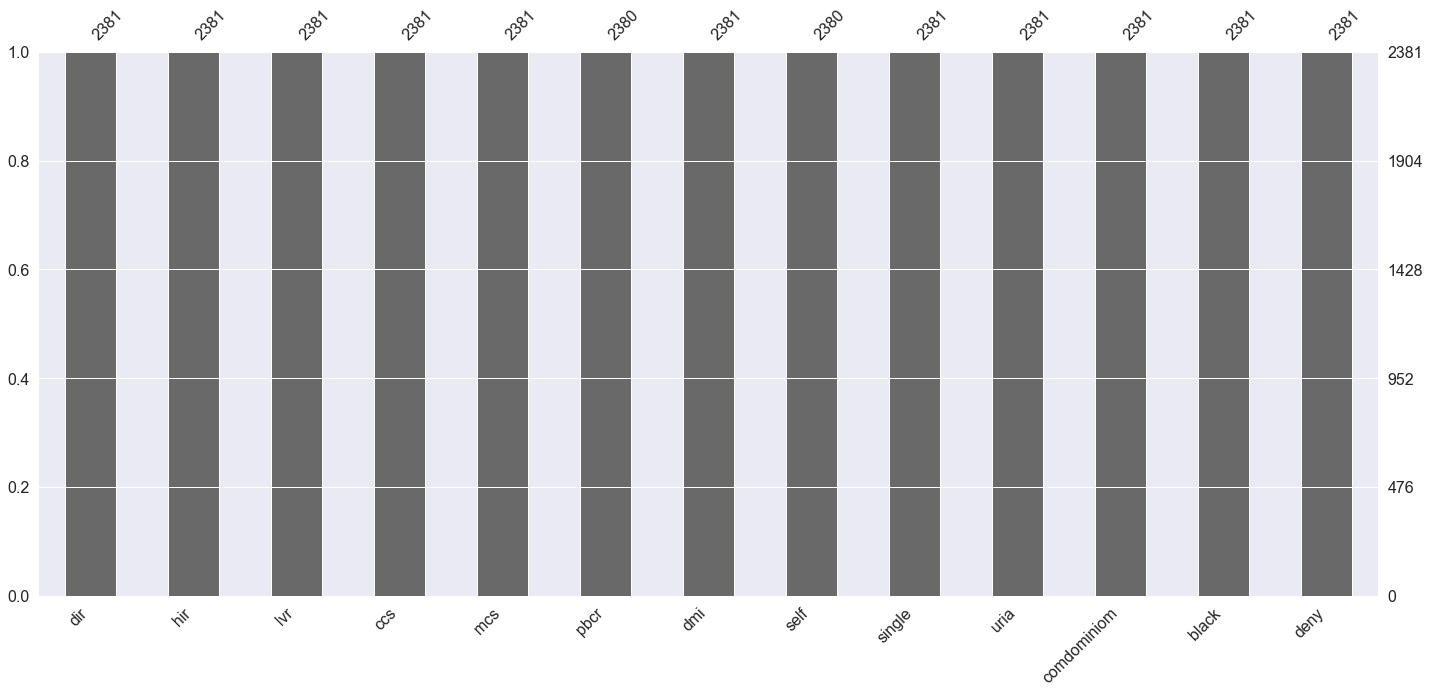

In [8]:
#first import missingno after pip install
import missingno as msno
#visualize the amount of missing data using missingno's bar chart
msno.bar(df)

#### Findings:

>1. The dataset consists of 13 useful variables and 2381 observations.We drop 1 unnamed column. 
2. There is only 1 missing value in column self and pbcr.
3. The types of data are the object, integer, and float, and comdominiom should be categorical attributes because it just contains 0 and 1.0 represent no, 1 represents yes.
4. There are no negative values. All minimum values for each column are at least 0.

#### 2. Check numerical and categorical columns

In [9]:
# since comdominiom is categorical variable, we will deal with it separately 

numerical_columns = []
categorical_columns = []

for i in df.columns[:]:
    if(df[i].dtype=='object'):
        categorical_columns.append(i)
    else:
        numerical_columns.append(i)
        
print('Numerical variables:',numerical_columns)
print('Categorical variables:',categorical_columns)

Numerical variables: ['dir', 'hir', 'lvr', 'ccs', 'mcs', 'uria', 'comdominiom']
Categorical variables: ['pbcr', 'dmi', 'self', 'single', 'black', 'deny']


#### Findings:
> 1. We can know the numerical variables of the original dataset are 6 attributes, including dir, hir, lvr, ccs, mcs, uria.
2. The categorical variables of the original dataset include 16 attributes, including pbcr, dmi, self, single, black, deny, and comdominiom.

#### 3. Visualize numerical columns

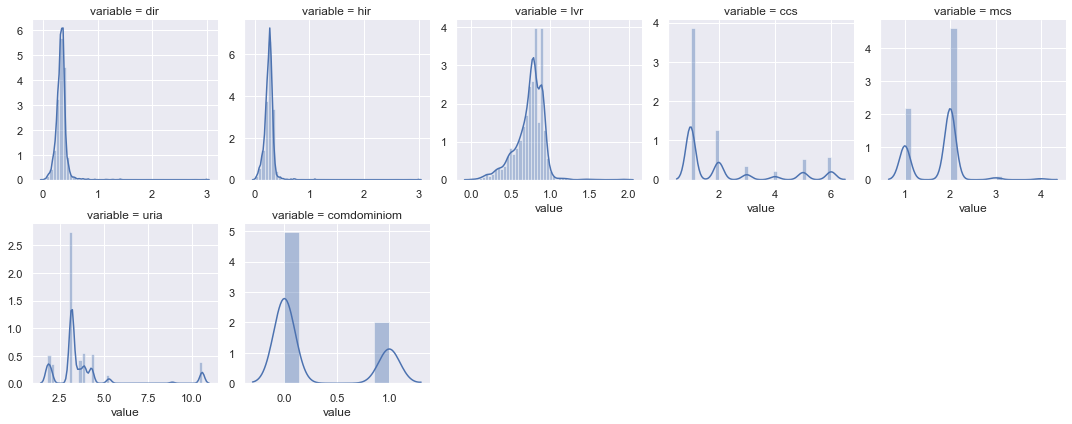

In [10]:
# Distributions for each of numerical variables.
nd = pd.melt(df[numerical_columns])
n1 = sns.FacetGrid (nd, col='variable', col_wrap=5, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

#### Findings: 
>1. From this visualization, we can see that dir and hir have outliers. 
2. Most people have a great consumer credit score(ccs), 1 or 2. 
3. Most people have a great mortgage credit score(mcs), 1 or 2.
4. The main Massachusetts unemployment rate for each applicants' industries in 1989 was around 3.
5. Although the data type of comdominiom is numerical, from the distribution we can see that it is the categorical data. 0 represents the unit is not comdominiom, 1 represents the unit is comdominiom.


In [11]:
# Put comdominiom to the categorical variables
numerical_columns = ['dir', 'hir', 'lvr', 'ccs', 'mcs', 'uria']
categorical_columns = ['pbcr', 'dmi', 'self', 'single', 'black', 'comdominiom', 'deny']


#### 4. Visualize categorical columns

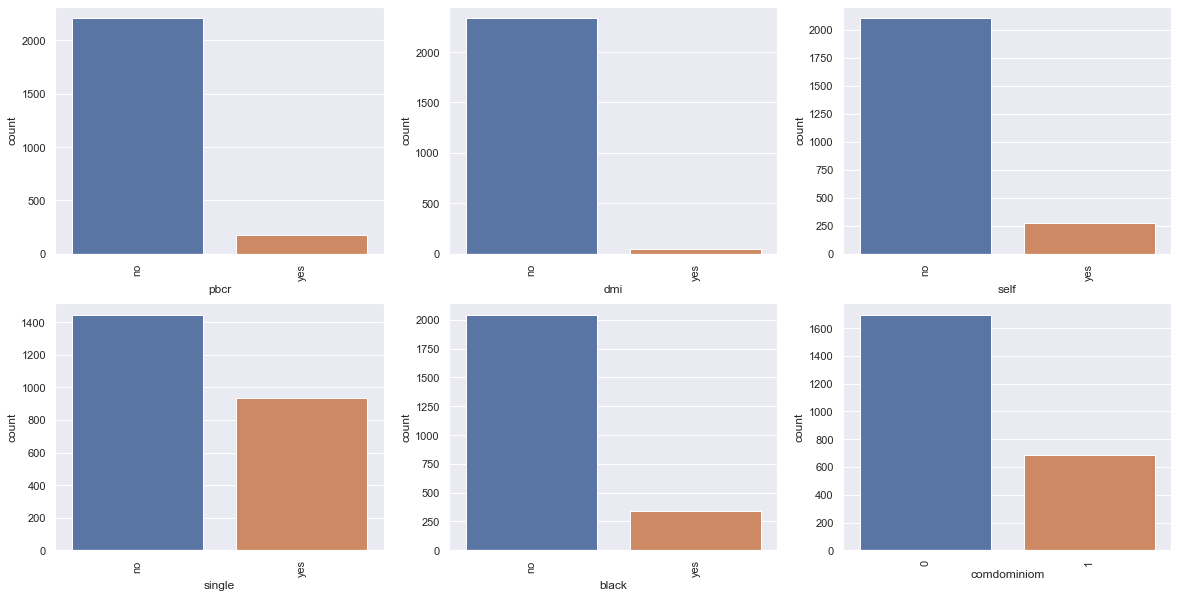

In [12]:
# create the bar chart for each categorical columns
fig, ax = plt.subplots(2, 3, figsize=(20, 10))
for variable, subplot in zip(categorical_columns, ax.flatten()):
    sns.countplot(df[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

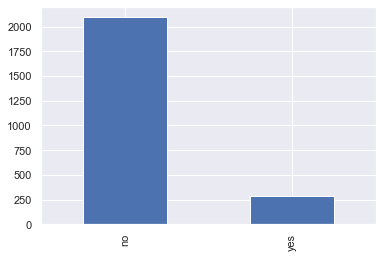

In [76]:
# create the bar chart for categorical value comdominiom, 0 = no, 1 = yes
df['deny'].value_counts().plot(kind='bar')

In [78]:
data['deny'].value_counts(normalize=True) * 100

no     88.030239
yes    11.969761
Name: deny, dtype: float64

#### Findings:
We can see the response variable - deny is imbalance data because the percentage of 'yes' (12%) is not equal or closed to 'no' (88%). To improve our model performance, we should make them in balance. So we will use the SMOTE algorithm to do it later.

#### 5. Compare the response variables in each discrete categorical explanatory variables 
-  The discrete attributes are ccs and mcs. Their range is from 1 to 6. A low value is a good score.
-  The categorical variables contain pbcr, dmi, self, single, commdominiom, and black. They all just have 2 unique values except missing value. 

Text(0, 0.5, 'Percentage')

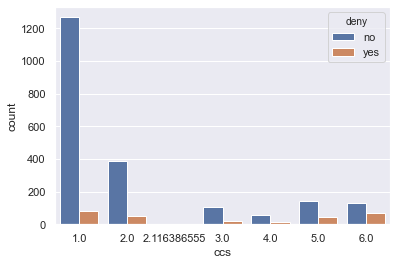

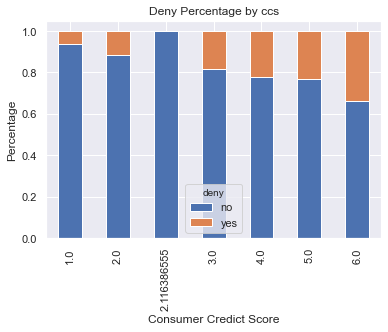

In [13]:
# compare the deny difference in ccs
sns.countplot(x='ccs',hue='deny', data=df)
# check the deny percentage of ccs
deny_ccs = pd.crosstab(df.ccs, df.deny)
deny_ccs.div(deny_ccs.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Deny Percentage by ccs')
plt.xlabel('Consumer Credict Score')
plt.ylabel('Percentage')

#### Findings: 
>1. From the graph above, we can see there is an outlier(2.1163). According to domain knowledge, the consumer credit score should be an integer. So we will check it out and delete this row.
2. The number of mortgage application deny is higher when consumer credit scores are lower (1 or 2) and higher (5 or 6). The middle class of consumer credit scores (3 or 4) has low numbers of mortgage application pass, especially have 4 consumer credit scores.
3. The lower consumer credit scores, the higher the number of mortgage applications passes, especially at low level (1 or 2) ccs. The other number of ccs may consider others' influence, so they do not fix this rule.


In [14]:
outlier_ccs = df[df['ccs'].isin(['2.116386555'])]
outlier_ccs

,dir,hir,lvr,ccs,mcs,pbcr,dmi,self,single,uria,comdominiom,black,deny
2380,0.330814,0.255346,0.700783,2.116387,1.721008,NaN,no,NaN,yes,3.774496,0,no,no


Text(0, 0.5, 'Percentage')

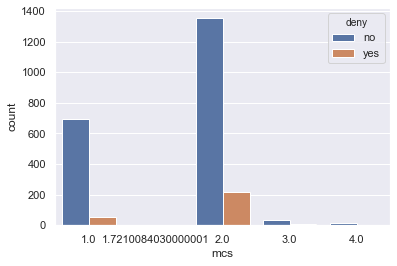

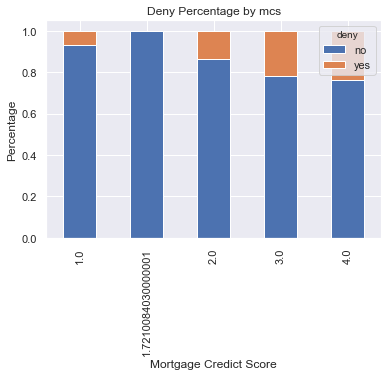

In [15]:
# compare the deny difference in mcs
sns.countplot(x='mcs',hue='deny', data=df)
# check the deny percentage of mcs
deny_mcs = pd.crosstab(df.mcs, df.deny)
deny_mcs.div(deny_mcs.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Deny Percentage by mcs')
plt.xlabel('Mortgage Credict Score')
plt.ylabel('Percentage')

#### Findings: 
>1. Similar to ccs, we should check and delete the row that mcs column has 1.7210084030000001 value.
2. The percentage of applicants who have lower mortgage credict scores and has a higher mortgage loan pass rate.
3. There are fewer people who have high mortgage credit scores applying for the mortgage loan. 

In [16]:
outlier_mcs = df[df['mcs'].isin(['1.7210084030000001'])]
outlier_mcs

,dir,hir,lvr,ccs,mcs,pbcr,dmi,self,single,uria,comdominiom,black,deny
2380,0.330814,0.255346,0.700783,2.116387,1.721008,NaN,no,NaN,yes,3.774496,0,no,no


Text(0, 0.5, 'Percentage')

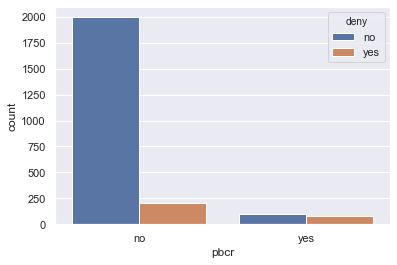

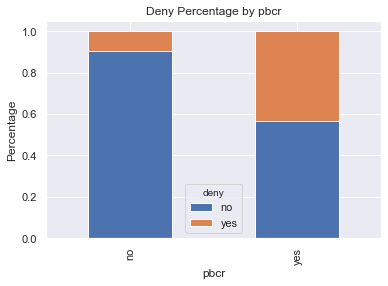

In [17]:
# compare the deny difference in pbcr
sns.countplot(x='pbcr',hue='deny', data=df)
# check the deny percentage of pbcr
deny_pbcr = pd.crosstab(df.pbcr, df.deny)
deny_pbcr.div(deny_pbcr.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Deny Percentage by pbcr')
plt.xlabel('pbcr')
plt.ylabel('Percentage')

#### Findings: 
>1. Most people who do not have a public bad credit record would apply for a mortgage loan. And they have a high probability to get the mortgage loan.
2. For people who have a public credit record, they almost have the same number of mortgage applications deny and pass. 
3. The percentage of applicants who do noy have public bad record and has a higher mortgage loan pass rate.

Text(0, 0.5, 'Percentage')

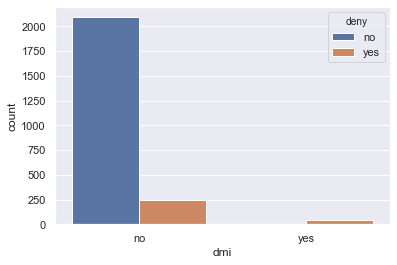

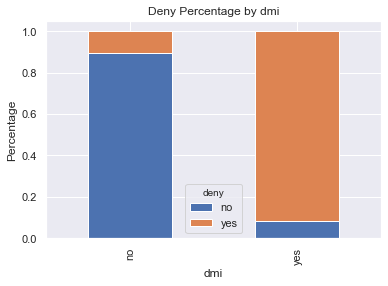

In [18]:
# compare the deny difference in dmi
sns.countplot(x='dmi',hue='deny', data=df)
# check the deny percentage of dmi
deny_dmi = pd.crosstab(df.dmi, df.deny)
deny_dmi.div(deny_dmi.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Deny Percentage by dmi')
plt.xlabel('dmi')
plt.ylabel('Percentage')

#### Findings: 
>1. Almost every applicant who reject mortgage insurance does not get the mortgage applications to pass.The percentage of applicants who refuse mortgage insurance and has a higher mortgage loan pass rate.
2. Most applicants who accept mortgage insurance are passed the mortgage applications.

Text(0, 0.5, 'Percentage')

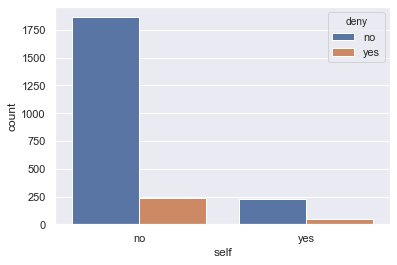

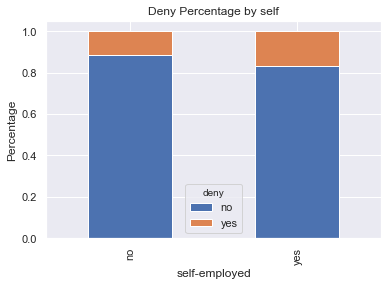

In [19]:
# compare the deny difference in self
sns.countplot(x='self',hue='deny', data=df)
# check the deny percentage of self
deny_self = pd.crosstab(df.self, df.deny)
deny_self.div(deny_self.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Deny Percentage by self')
plt.xlabel('self-employed')
plt.ylabel('Percentage')

#### Findings: 
>1. Most applicants who are not self-employed are passed the mortgage applications.
2. Most applicants who want to apply for a mortgage loan are not self-employed.
3. The percentage of applicants who are not self-employed and has a higher mortgage loan pass rate.

Text(0, 0.5, 'Percentage')

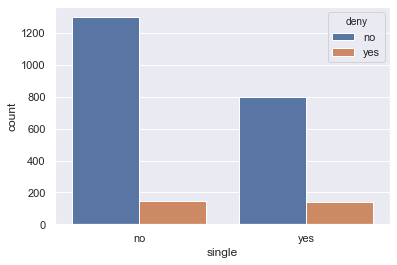

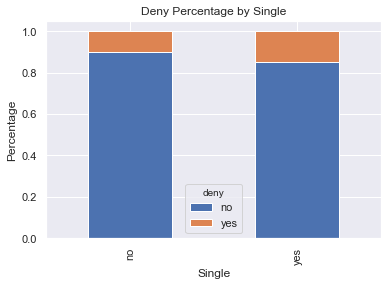

In [20]:
# compare the deny difference in single
sns.countplot(x='single',hue='deny', data=df)
# check the deny percentage of single
deny_single = pd.crosstab(df.single, df.deny)
deny_single.div(deny_single.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Deny Percentage by Single')
plt.xlabel('Single')
plt.ylabel('Percentage')

#### Findings: 
>1. Most, not single applicants would like to apply for a mortgage loan. 
2. The number of mortgage loans denies for single applicants is almost the same not single. Consider the total applicants of single is more than not single applicants, single applicants have higher mortgage application deny rate.
3. The percentage of applicants who are not single and has a higher mortgage loan pass rate.

Text(0, 0.5, 'Percentage')

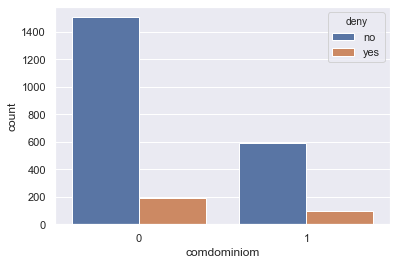

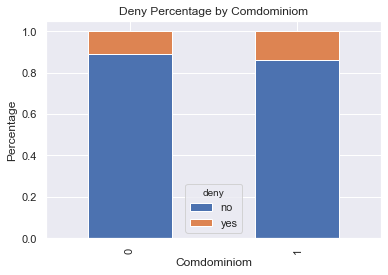

In [21]:
# compare the deny difference in comdominiom
sns.countplot(x='comdominiom',hue='deny', data=df)
# check the deny percentage of comdominiom
deny_comdominiom = pd.crosstab(df.comdominiom, df.deny)
deny_comdominiom.div(deny_comdominiom.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Deny Percentage by Comdominiom')
plt.xlabel('Comdominiom')
plt.ylabel('Percentage')

#### Findings: 
>1. Most applicants who own house types are not comdominiom.
2. The percentage of applicants who own the house types is not comdominiom and has a higher mortgage loan pass rate.

Text(0, 0.5, 'Percentage')

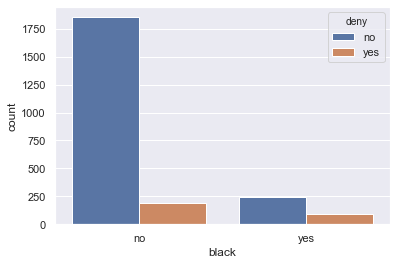

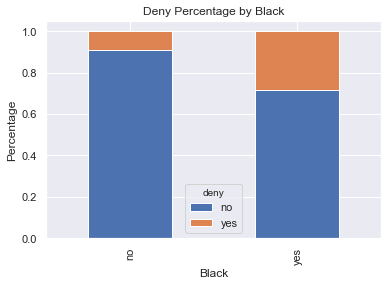

In [22]:
# compare the deny difference in black
sns.countplot(x='black',hue='deny', data=df)
# check the deny percentage of black
deny_black = pd.crosstab(df.black, df.deny)
deny_black.div(deny_black.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Deny Percentage by Black')
plt.xlabel('Black')
plt.ylabel('Percentage')

#### Findings: 
>1. There are fewer black people apply for the mortgage loan.
3. The percentage of applicants who are not black have a higher mortgage loan pass rate.

#### 6. Check Outliers
   We use the standdard deviation to define the outliers whose Z scores are more than 3 (99.7% confident interval).

In [23]:
def remove_outliers(col_name):
    """
    Removing the outliers that are 2.5 standard deviations away from the mean.
    """
    return df[np.abs(df[col_name] - df[col_name].mean() ) > (3 * df[col_name].std() )]

In [24]:
# find all rows that have dir values whose values are > 2.5 standard deviations from the mean of data in that column
dir_outliers = remove_outliers('dir')
print('min:',dir_outliers.dir.min())
print('max',dir_outliers.dir.max())
print('number of outliers:',dir_outliers.shape[0])

min: 0.0
max 3.0
number of outliers: 20


In [25]:
# find all rows that have lvr values whose values are > 2.5 standard deviations from the mean of data in that column
lvr_outliers = remove_outliers('lvr')
print('min:',lvr_outliers.lvr.min())
print('max',lvr_outliers.lvr.max())
print('number of outliers:', lvr_outliers.shape[0])

min: 0.02
max 1.95
number of outliers: 32


In [26]:
# find all rows that have hir values whose values are > 2.5 standard deviations from the mean of data in that column
hir_outliers = remove_outliers('hir')
print('min:',hir_outliers.hir.min())
print('max',hir_outliers.hir.max())
print('number of outliers:',hir_outliers.shape[0])

min: 0.58
max 3.0
number of outliers: 12


In [27]:
# find all rows that have ccs values whose values are > 2.5 standard deviations from the mean of data in that column
ccs_outliers = remove_outliers('ccs')
print('min:',ccs_outliers.ccs.min())
print('max',ccs_outliers.ccs.max())
print('number of outliers:',ccs_outliers.shape[0])

min: nan
max nan
number of outliers: 0


In [28]:
# find all rows that have mcs values whose values are > 2.5 standard deviations from the mean of data in that column
mcs_outliers = remove_outliers('mcs')
print('min:',mcs_outliers.mcs.min())
print('max',mcs_outliers.mcs.max())
print('number of outliers:',mcs_outliers.shape[0])

min: 4.0
max 4.0
number of outliers: 21


In [29]:
# find all rows that have uria values whose values are > 2.5 standard deviations from the mean of data in that column
uria_outliers = remove_outliers('uria')
print('min:',uria_outliers.uria.min())
print('max',uria_outliers.uria.max())
print('number of outliers:',uria_outliers.shape[0])

min: 10.60000038
max 10.60000038
number of outliers: 159


Although there some outliers in the dataset, we will keep them. Because according to the domain knowledge, in the real world these outliers may still happen. For example, some people may have a very bad Debt-to-Income Ratio, so we think all outliers in each column are meaningful. 

Second, since our dataset is not enough large and the total outliers are about 250, to ensure the accuracy and integrity of the data, we decide that do not remove these outliers. 

#### 7. Check Duplicated data

In [30]:
# Select duplicate rows except first occurrence based on all columns
duplicateRowsDF = data[data.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF)

Duplicate Rows except first occurrence based on all columns are :
Empty DataFrame
Columns: [Unnamed: 0, dir, hir, lvr, ccs, mcs, pbcr, dmi, self, single, uria, comdominiom, black, deny]
Index: []


There is no duplicated row base on Unnamed: 0 column which is the id of each applicant.

#### 8. Check Correlation 

Text(0.5, 1.0, 'Figure 5: Correlations')

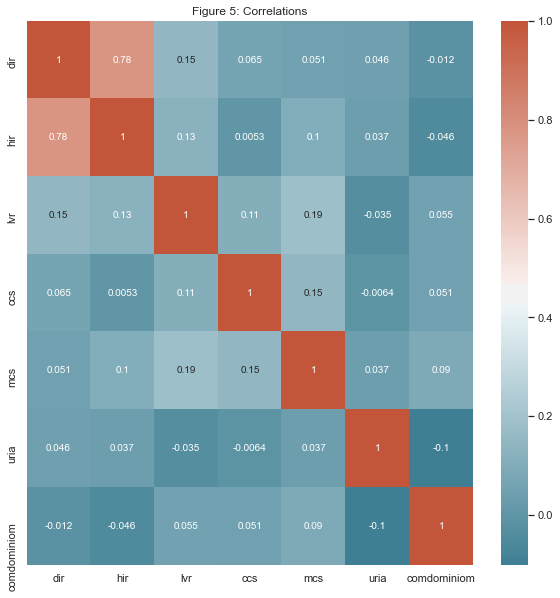

In [31]:
# Finding the correlation bewteen the Features.
plt.figure(figsize=(10,10))

corr = df.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
            annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.title('Figure 5: Correlations')

#### Findings: 
>1. There are strong relationship between hir and dir. 
2. There are weak relationships (correlationno more than 0.2) in three groups which are between dir and lvr, mcs and ccs, mcs and lvr. 
3. There are no obvious relationship in dirrferent groups.

***
### Step 3: Data Cleaning
1. Drop the missing value row and outliers cleaning
2. Duplicated data Cleaning - There are no duplicated data, we do not need to clean it.
3. Rerun EDA

#### 1. Drop the missing value row
Consider there is only one row that contains missing value and the percentage of total dataset is less than 1%, we decide to drop the row. Also, the outlier of ccs and mcs is in the same row.

In [32]:
# extract the rows that contain missing value
# this row also contains the outlier value 2.1163

null_data = df[df.isnull().any(axis=1)]
null_data

,dir,hir,lvr,ccs,mcs,pbcr,dmi,self,single,uria,comdominiom,black,deny
2380,0.330814,0.255346,0.700783,2.116387,1.721008,NaN,no,NaN,yes,3.774496,0,no,no


In [33]:
# drop the missing value row
df1 = df.dropna()
# Show missing value
miss = df1.isnull().sum()
#miss = miss[miss > 0]
#miss.sort_values(inplace=True)
miss

dir            0
hir            0
lvr            0
ccs            0
mcs            0
pbcr           0
dmi            0
self           0
single         0
uria           0
comdominiom    0
black          0
deny           0
dtype: int64

#### Findings:

1. There are 7 explanatory variables have missing values, including normalized_losses, num_of_doors, bore, storke, horsepower, peak_rpm, and price.
2. The attributes of normalized_losses, bore, storke, and price  have approximately 20% missing values.
3. There are 179 completed rows without any missing values.

Text(0.5, 1.0, ' Percents of nonmissing data with missingno')

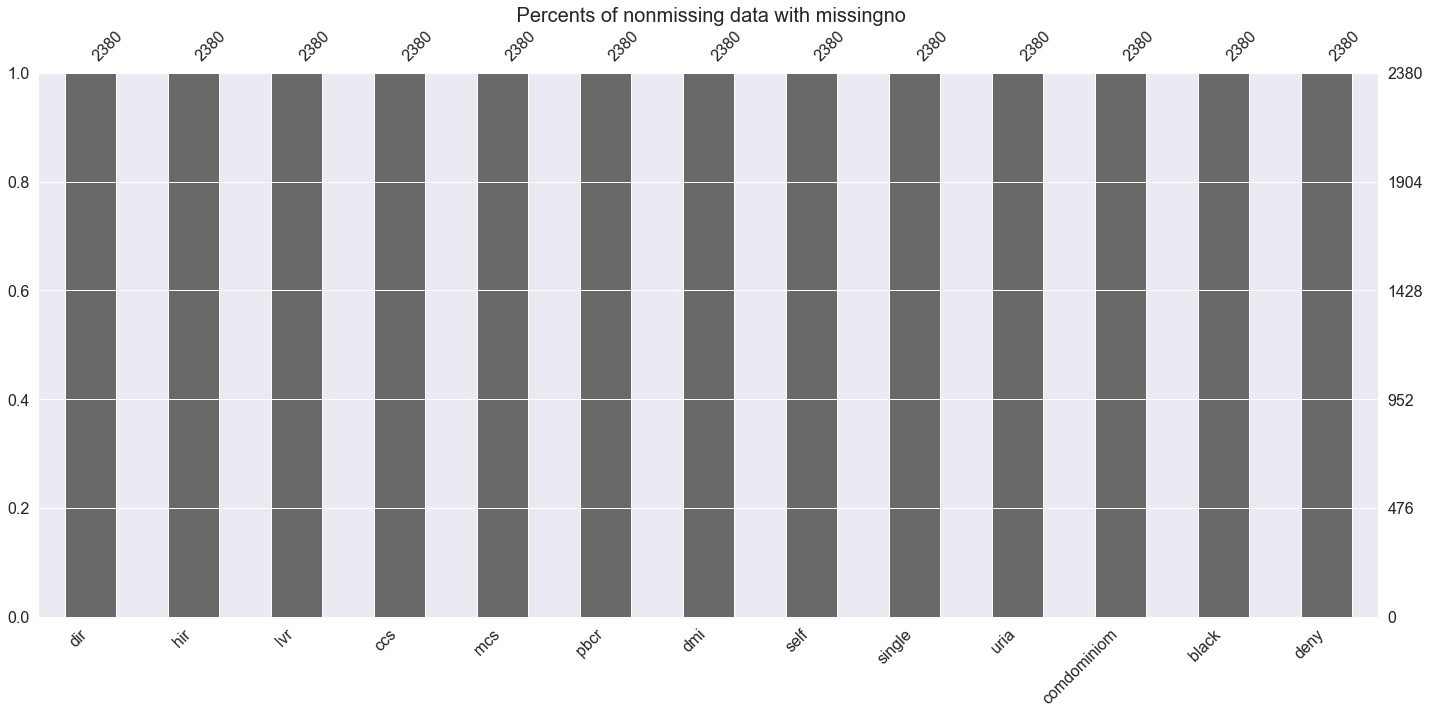

In [34]:
# recreate the bar charts to show percents of nonmissing databy missingo function
msno.bar(df1)
plt.title(' Percents of nonmissing data with missingno',fontsize=20)

#### 3. Rerun EDA

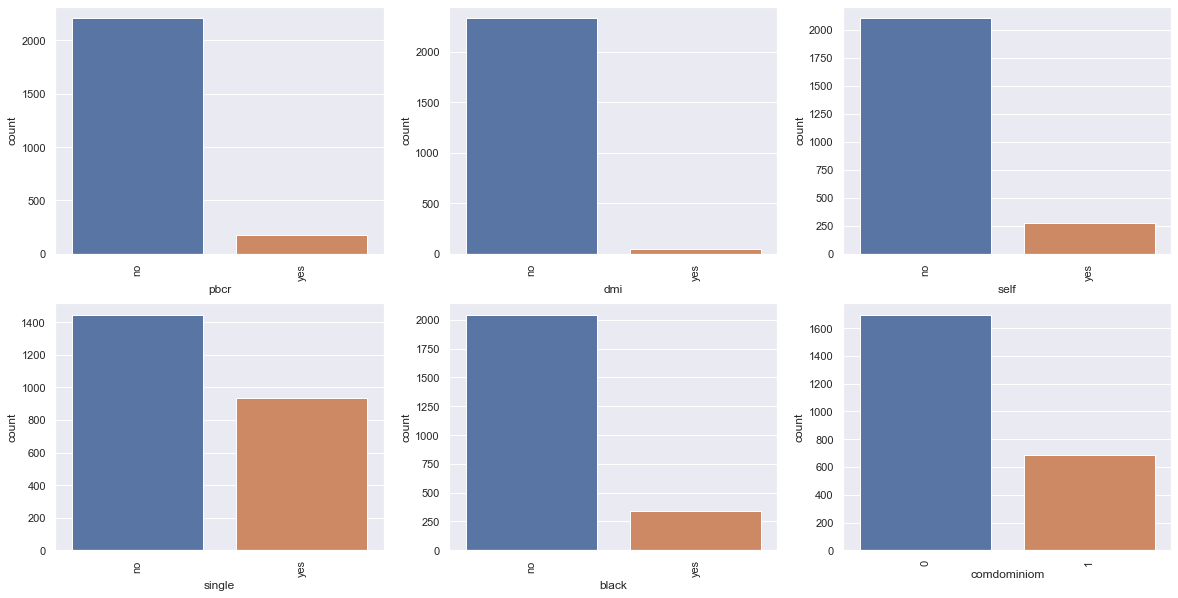

In [35]:
# create the bar chart for each categorical columns
fig, ax = plt.subplots(2, 3, figsize=(20, 10))
for variable, subplot in zip(categorical_columns, ax.flatten()):
    sns.countplot(df1[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

#### Findings: 
>1. From this visualization, we can obviously see that the compression_ration, engine_size, horsepower, normalized_losses,price and wheel_base variables are strongly right skewed.
2. Since the scales of the numerical variables are different, we'll not remove outliers here.

#### 4. Create dummy for categorical variables
Create dummy indicators for the categorical variables(include the "deny" response variable) - African_American, condo, single, self, dmi, pbcr, and deny. For example, the new dummy variable 'IsAfricanAmerican' contains a '1' if the 'African_American' value for an applicant is 'yes' and a '0' otherwise.

In [36]:
# create dummy for the columns pbcr,dmi,self,single,black,and deny
df1= pd.get_dummies(df,columns=['pbcr','dmi','self','single','black','deny'], drop_first=True)
df1.head()

,dir,hir,lvr,ccs,mcs,uria,comdominiom,pbcr_yes,dmi_yes,self_yes,single_yes,black_yes,deny_yes
0,0.221,0.221,0.800000,5.0,2.0,3.9,0,0,0,0,0,0,0
1,0.265,0.265,0.921875,2.0,2.0,3.2,0,0,0,0,1,0,0
2,0.372,0.248,0.920398,1.0,2.0,3.2,0,0,0,0,0,0,0
3,0.320,0.250,0.860465,1.0,2.0,4.3,0,0,0,0,0,0,0
4,0.360,0.350,0.600000,1.0,1.0,3.2,0,0,0,0,0,0,0


Text(0.5, 1.0, 'Figure 5: Correlations')

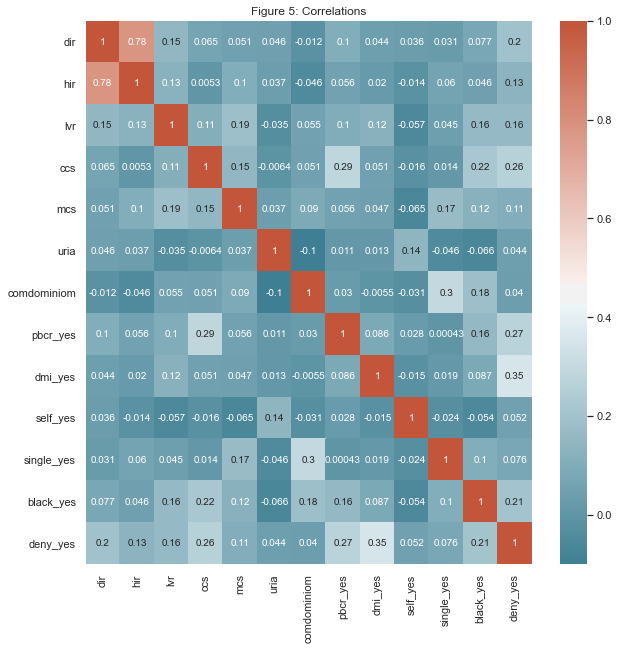

In [37]:
# rerun the correlation bewteen the Features.
plt.figure(figsize=(10,10))

corr = df1.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
            annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.title('Figure 5: Correlations')

1. According to the correlation, variable dir, ccs, pbcr, dmi, and black have the strongest relationships with deny even their correlations are no more than 0.36. These can be the first model exploratory variables.
2. The correlations of variable hir, lvr, and mcs are more than 0.1 and less than 0.2. 
3. There are multicollinearity between hir and dir, we will use VIF to do further analysis to if we need to delete any of them. 

***
### Step 4: Feature Engineering and Feature Selection

For this step, we'll perform:
   1. Split data into training and testing subsets
   2. Scaling numerical values using Standard Scale (except dummy variables)
   3. Use SMOTE to balance data
   4. Perform Feature Selection by using Correlation coefficients, RFECV:
 - 4a. Detect multicollinearity by using Correlation Coefficients
 - 4b. Select features by using Recursive feature elimination with cross-validation (RFECV)

#### 1. Split data into training and testing subsets

Before doing feature selection,we'll split data into training and testing subsets by using the `train_test_split` function. The test_size=0.3 inside the function indicates the percentage of the data that should be held over for testing. It’s 70/30, 30% of the data for testing.

In [38]:
# Create X and y
X = df1.drop(columns = "deny_yes")
y = df1[['deny_yes']]

In [39]:
# evaluate the model by splitting into train and test sets

# Now split the data into training and testing subsets. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

# check the results
print('Training dataset shape:', X_train.shape, y_train.shape)
print('Testing dataset shape:', X_test.shape, y_test.shape)

Training dataset shape: (1666, 12) (1666, 1)
Testing dataset shape: (715, 12) (715, 1)


#### 2. Scaling numerical values using Standard Scale (except dummy variables)

Since some variables have different scales, we'll use `StandardScaler` to remove the mean and scale the data to unit variance.

Standardization is a scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

We'll use `StandardScaler` for the train dataset, then do the same to the test dataset.


In [40]:
# set up numerical variables

Numerical_columns=['dir', 'hir', 'lvr', 'ccs', 'mcs', 'uria']

In [41]:
# disable the 'SettingWithCopyWarning'
pd.options.mode.chained_assignment = None

#Feature Scaling on the train dataset
sc = StandardScaler()

for i in numerical_columns[:-1]:
    X_train[i] = X_train[i].astype('float64')
    X_train[i] =  sc.fit_transform(X_train[i].values.reshape(-1,1))
    
X_train.head()

,dir,hir,lvr,ccs,mcs,uria,comdominiom,pbcr_yes,dmi_yes,self_yes,single_yes,black_yes
1117,-1.418060,-1.215843,-3.911159,-0.659918,0.507029,3.6,0,0,0,0,0,0
46,-0.547748,0.029640,0.335098,2.330898,0.507029,3.2,0,1,0,0,0,0
1379,0.148502,-0.449392,0.972651,-0.659918,-1.365944,3.1,1,0,0,0,1,0
2214,0.815161,0.405201,0.227284,-0.659918,0.507029,3.2,1,0,0,0,1,1
105,0.148502,0.700284,1.051681,-0.659918,0.507029,3.9,0,0,1,0,1,0


In [42]:
# disable the 'SettingWithCopyWarning'
pd.options.mode.chained_assignment = None

#Feature Scaling on th train dataset
sc = StandardScaler()

for i in numerical_columns[:-1]:
    X_test[i] = X_test[i].astype('float64')
    X_test[i] =  sc.fit_transform(X_test[i].values.reshape(-1,1))
    
X_test.head()

,dir,hir,lvr,ccs,mcs,uria,comdominiom,pbcr_yes,dmi_yes,self_yes,single_yes,black_yes
2147,0.799353,-0.136807,0.380930,-0.088987,0.548508,3.2,0,0,0,0,0,0
1906,4.788370,5.417276,0.380930,2.332165,0.548508,3.2,1,1,0,0,1,1
347,-2.149052,-1.747571,-2.391459,-0.694275,-1.290318,3.2,0,0,0,0,0,0
786,-0.183449,-0.818795,0.215906,-0.088987,0.548508,3.2,0,0,0,0,1,1
14,-1.686557,-1.349524,-2.145987,-0.694275,-1.290318,3.2,0,0,0,0,0,0


#### 3. Over-sampling using SMOTE

Balance data will perform a better classification than inbalance, however our data is imbalance class in the response we will use SMOTE to balance it.


SMOTE (Synthetic Minority Over-sampling Technique) is a type of over-sampling procedure that is used to correct the imbalances in the groups. This technique creates new data instances of the minority groups by copying existing minority instances and making small changes to them. This makes SMOTE great at amplifying signals that already exist in the minority groups, but won’t create new information for those groups.

In [52]:
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)
columns = X_train.columns
X_smote,y_smote=os.fit_sample(X_train, y_train)

os_data_X = pd.DataFrame(data=X_smote,columns=columns )
os_data_y= pd.DataFrame(data=y_smote,columns=['deny_yes'])

# we can Check the numbers of our data
print("length of oversampled data is ",len(X_smote))
print("Number of no deny in oversampled data",len(y_smote[y_smote['deny_yes']==0]))
print("Number of deny",len(y_smote[y_smote['deny_yes']==1]))
print("Proportion of no deny data in oversampled data is ",len(y_smote[y_smote['deny_yes']==0])/len(X_smote))
print("Proportion of deny data in oversampled data is ",len(y_smote[y_smote['deny_yes']==1])/len(X_smote))

length of oversampled data is  2922
Number of no deny in oversampled data 1461
Number of deny 1461
Proportion of no deny data in oversampled data is  0.5
Proportion of deny data in oversampled data is  0.5


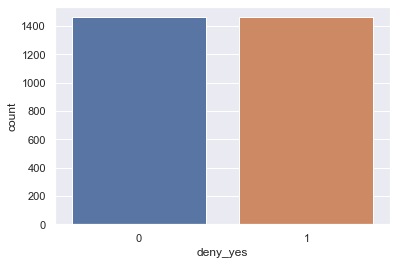

In [53]:
# observe that data has been balanced
sns.countplot(x='deny_yes', data=os_data_y)

The training dataset has been banlanced.

#### 4. Perform Feature Selection by using Correlation coefficients, RFECV, and VIFs:
 - 4a. Detect multicollinearity by using Correlation Coefficients and Set Correlation thresholds

In [54]:
# merge the new dataset that we have done the scaling and SMOTE process

df2 = os_data_X.copy()
df2['deny_yes'] = os_data_y
df2

,dir,hir,lvr,ccs,mcs,uria,comdominiom,pbcr_yes,dmi_yes,self_yes,single_yes,black_yes,deny_yes
0,-1.418060,-1.215843,-3.911159,-0.659918,0.507029,3.600000,0,0,0,0,0,0,0
1,-0.547748,0.029640,0.335098,2.330898,0.507029,3.200000,0,1,0,0,0,0,1
2,0.148502,-0.449392,0.972651,-0.659918,-1.365944,3.100000,1,0,0,0,1,0,0
3,0.815161,0.405201,0.227284,-0.659918,0.507029,3.200000,1,0,0,0,1,1,0
4,0.148502,0.700284,1.051681,-0.659918,0.507029,3.900000,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2917,1.245507,0.833961,-0.406065,-0.381718,0.507029,3.200000,1,0,0,0,0,1,1
2918,-0.250742,0.245567,0.516801,-0.659918,0.507029,3.716246,0,0,0,0,1,0,1
2919,-0.115803,0.113912,0.449406,2.330898,0.507029,3.200000,1,0,0,0,1,1,1
2920,0.849087,0.992476,0.650869,2.141442,-1.365944,3.326692,0,0,0,0,0,0,1


Text(0.5, 1.0, 'Figure 6: Correlations')

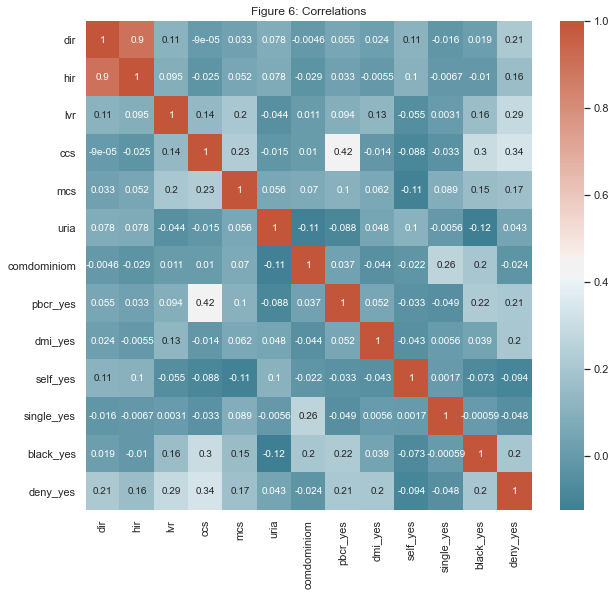

In [55]:
# Finding the correlation bewteen the Features.
plt.figure(figsize=(10,9))

corr = df2.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
            annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.title('Figure 6: Correlations')

#### Findings: 
>1. From this visualization, we can obviously see that the dir and hir are the multicollinearities which have 0.9 correlation values. 
2. We need to delete one from them. However, we can see that the coefficient of dir and hir with the response variable is 0.21, 0.16 respectively, so we decide to drop hir as it has less relationship to the deny.

In [56]:
# Drop hir feature
os_data_X1 = os_data_X[['dir', 'lvr', 'ccs', 'mcs', 'uria', 'comdominiom', 'pbcr_yes', 'dmi_yes', 'single_yes', 'black_yes']]

#### 4b Select features by using Recursive feature elimination with cross-validation (RFECV)

RFE requires a specified number of features to keep, **however it is usually not known in advance how many features are valid**. To find the optimal number of features, cross-validation is used with RFE to score different feature subsets and select the best scoring collection of features.

reference: https://medium.com/analytics-vidhya/feature-selection-using-scikit-learn-5b4362e0c19b

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
# use randomforestclassifier to find the best features
cv_estimator = RandomForestClassifier(random_state =42)
cv_estimator.fit(os_data_X1, os_data_y)
cv_selector = RFECV(cv_estimator, cv=10, step=1)
cv_selector = cv_selector.fit(os_data_X1, os_data_y)
rfecv_mask = cv_selector.get_support() #list of booleans

rfecv_features = [] 

for bool, feature in zip(rfecv_mask, os_data_X1.columns):
    if bool:
        rfecv_features.append(feature)

print('Optimal number of features :', cv_selector.n_features_)
print('Best features :', rfecv_features)

C:\Users\13750\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
C:\Users\13750\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Optimal number of features : 10
Best features : ['dir', 'lvr', 'ccs', 'mcs', 'uria', 'comdominiom', 'pbcr_yes', 'dmi_yes', 'single_yes', 'black_yes']


So after the RFECV selection, our Optimal number of features is: 10

Best features: ['dir', 'lvr', 'ccs', 'mcs', 'uria', 'comdominiom', 'pbcr_yes', 'dmi_yes', 'single_yes', 'black_yes']

### Step 5: Classification Models: K-Nearest Neighbors (KNN), Support Vector Machines (SVM) 

We would build four models in total by different features:

Model1: use the full features(12) before we do the feature selection for KNN

Model2: use the features(10) after we did the feature selection for KNN 

Model3: use the full features(12) before we do the feature selection for SVM  

Model4: use the full features(10) after we did the feature selection for SVM


#### Model1:K-Nearest Neighbors
K-Nearest Neighbors (KNN) is a supervised machine learning algorithm most frequently used for solving classification problems.

KNN has two underlying assumptions:
 
1) We can use a distance metric to calculate the “distance” between any two given data observations within a data set
 
2) Data observations that are “near” to one another are likely to be similar to each other.
 
“K” is a constant representing the number of nearby/neighboring training set data points (or data observations) to be used to predict a valid classification for a given data point.
 
K= 5， Since small K may let our predictions become less stable and too high K may also increase our prediction error, we choose the n_neighbors = 5 for our model.

###### In the model 01 and 03, we want to use all features to build the model because we find that our best features are 10. There are a total of 12 explanatory variables in the dataset. We want to see the performance of models' differences between all variables and the 10 best variables. 

In [79]:
#Create a KNN model with all features
from sklearn.neighbors import KNeighborsClassifier

# get features for model1
Featuer1 = os_data_X

KNN_Classifier1 = KNeighborsClassifier(n_neighbors = 5, p = 2, metric='minkowski')

#Train the model
KNN_Classifier1.fit(Featuer1, os_data_y)

#Let's predict the classes for test data
pred_test1 = KNN_Classifier1.predict(X_test)

#predict the first one test data
KNN_Classifier1.predict(X_test.iloc[[0]])
#get the probability 
probability1 = KNN_Classifier1.predict_proba(X_test.iloc[[0]])
#get the log probability
#log_prob1 = KNN_Classifier1.predict_log_proba(X_test.iloc[[0]])

#get scores for the model
score1 = KNN_Classifier1.score(X_test, y_test)
score1

C:\Users\13750\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


0.7146853146853147

#### Model2: Use 10 features after we did the feature selection for KNN 

In [59]:
#Create a KNN model
# Since small K may let our predictions become less stable and too high K may also increse our prediction error, 
# we choose the n_neighbors = 5 for our model.

from sklearn.neighbors import KNeighborsClassifier

# get features for model1
Featuer2 = os_data_X[['dir', 'lvr', 'ccs', 'mcs', 'uria', 'comdominiom', 'pbcr_yes', 'dmi_yes', 'single_yes', 'black_yes']]
X_test2 = X_test[['dir', 'lvr', 'ccs', 'mcs', 'uria', 'comdominiom', 'pbcr_yes', 'dmi_yes', 'single_yes', 'black_yes']]


KNN_Classifier2 = KNeighborsClassifier(n_neighbors = 5, p = 2, metric='minkowski')

#Train the model
KNN_Classifier2.fit(Featuer2, os_data_y)

#Let's predict the classes for test data
pred_test2 = KNN_Classifier2.predict(X_test2)

#predict the first one test data
KNN_Classifier2.predict(X_test2.iloc[[0]])
#get the probability 
probability2 = KNN_Classifier2.predict_proba(X_test2.iloc[[0]])
#get the log probability
#log_prob1 = KNN_Classifier1.predict_log_proba(X_test.iloc[[0]])

#get scores for the model
score2 = KNN_Classifier2.score(X_test2, y_test)
score2

C:\Users\13750\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app


0.7496503496503496

#### Model3: Support Vector Machines

Support Vector Machines (SVM) are supervised machine learning algorithms most frequently used for solving classification problems.

SVM uses the concept of margin classification, wherein we attempt to identify classifications within a data set by deriving a decision boundary that maximizes the distance between groups of data points.
SVM identifies parallel hyperplanes that separate the classes of data via the maximum distance possible relative to the constraints of the data set.

Use full features after we did the feature selection for SVM

In [61]:
from sklearn.svm import SVC
# get features for model1
Featuer1 = os_data_X

#Train the model
svc3 = SVC(random_state=42, probability=True)
svc3.fit(Featuer1, os_data_y)

#Let's predict the classes for test data
pred_test3 = svc3.predict(X_test)

#get scores for the model
score3 = svc3.score(Featuer1, os_data_y)

score3

C:\Users\13750\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7713894592744696

#### Model4: SVM with 10 features after we did the feature selection 

In [62]:
from sklearn.svm import SVC
# get features for model1
Featuer2 = os_data_X[['dir', 'lvr', 'ccs', 'mcs', 'uria', 'comdominiom', 'pbcr_yes', 'dmi_yes', 'single_yes', 'black_yes']]
X_test2 = X_test[['dir', 'lvr', 'ccs', 'mcs', 'uria', 'comdominiom', 'pbcr_yes', 'dmi_yes', 'single_yes', 'black_yes']]


#Train the model
svc4 = SVC(random_state=42, probability=True)
svc4.fit(Featuer2, os_data_y)

#Let's predict the classes for test data
pred_test4 = svc4.predict(X_test2)

#get scores for the model
score4 = svc4.score(Featuer2, os_data_y)
score4

C:\Users\13750\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7679671457905544

### Step 6. Evaluate Models and Select a Final Model


In [63]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score, roc_auc_score, roc_curve

from sklearn.metrics import plot_confusion_matrix

#### 1. Model Evaluation - confusion matrix
The Confusion Matrix describes the predictions that the model made as either True (correct) or False (wrong). It compares these to the real truth. A perfect model would have only True Positives and True Negatives.


['Confusion matrix02']
[[472 163]
 [ 41  39]]


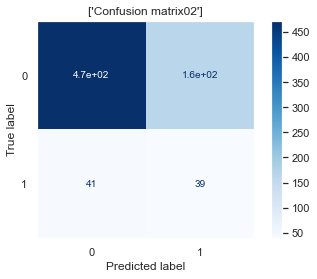

['Confusion matrix02']
[[489 146]
 [ 33  47]]


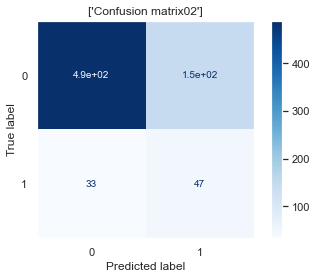

['Confusion matrix03']
[[474 161]
 [ 28  52]]


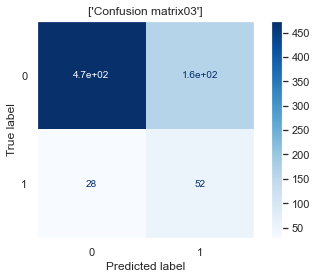

['Confusion matrix04']
[[487 148]
 [ 29  51]]


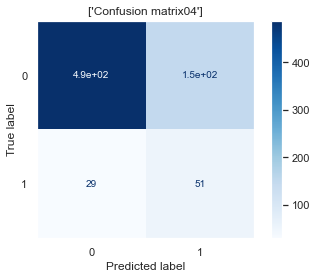

In [75]:
#print the Confusion matrix for test data set in each model

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
title = ["Confusion matrix01"]
disp = plot_confusion_matrix(KNN_Classifier1, X_test, y_test, cmap=plt.cm.Blues)
disp.ax_.set_title(titles_options)
plt.grid(False)
print(titles_options)
print(disp.confusion_matrix)
plt.show()

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
title = ["Confusion matrix02"]
disp = plot_confusion_matrix(KNN_Classifier2, X_test2, y_test, cmap=plt.cm.Blues)
disp.ax_.set_title(title)
plt.grid(False)
print(title)
print(disp.confusion_matrix)
plt.show()


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
title = ["Confusion matrix03"]
disp = plot_confusion_matrix(svc3, X_test, y_test, cmap=plt.cm.Blues)
disp.ax_.set_title(title)
plt.grid(False)
print(title)
print(disp.confusion_matrix)
plt.show()


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
title = ["Confusion matrix04"]
disp =plot_confusion_matrix(svc4, X_test2, y_test, cmap=plt.cm.Blues)
disp.ax_.set_title(title)
plt.grid(False)
print(title)
print(disp.confusion_matrix)
plt.show()

#### 2. Model Evaluation - model_report
To quote from Scikit Learn:https://medium.com/@MohammedS/performance-metrics-for-classification-problems-in-machine-learning-part-i-b085d432082b

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score weights the recall more than the precision by a factor of beta. beta = 1.0 means recall and precision are equally important.

In [66]:
print("Model 1:")
print("Accuracy = " , accuracy_score(y_test, pred_test1))
print("Precision = " ,precision_score(y_test, pred_test1))
print("Recall = " ,recall_score(y_test, pred_test1))
print("F1 Score = " ,f1_score(y_test, pred_test1))
print("-------------------------------------------")

print("Model 2:")
print("Accuracy = " , accuracy_score(y_test, pred_test2))
print("Precision = " ,precision_score(y_test, pred_test2))
print("Recall = " ,recall_score(y_test, pred_test2))
print("F1 Score = " ,f1_score(y_test, pred_test2))
print("-------------------------------------------")

print("Model 3:")
print("Accuracy = " , accuracy_score(y_test, pred_test3))
print("Precision = " ,precision_score(y_test, pred_test3))
print("Recall = " ,recall_score(y_test, pred_test3))
print("F1 Score = " ,f1_score(y_test, pred_test3))
print("-------------------------------------------")

print("Model 4:")
print("Accuracy = " , accuracy_score(y_test, pred_test4))
print("Precision = " ,precision_score(y_test, pred_test4))
print("Recall = " ,recall_score(y_test, pred_test4))
print("F1 Score = " ,f1_score(y_test, pred_test4))
print("-------------------------------------------")

Model 1:
Accuracy =  0.7146853146853147
Precision =  0.19306930693069307
Recall =  0.4875
F1 Score =  0.2765957446808511
-------------------------------------------
Model 2:
Accuracy =  0.7496503496503496
Precision =  0.24352331606217617
Recall =  0.5875
F1 Score =  0.3443223443223444
-------------------------------------------
Model 3:
Accuracy =  0.7356643356643356
Precision =  0.24413145539906103
Recall =  0.65
F1 Score =  0.35494880546075086
-------------------------------------------
Model 4:
Accuracy =  0.7524475524475525
Precision =  0.2562814070351759
Recall =  0.6375
F1 Score =  0.3655913978494624
-------------------------------------------


From these model report, we can see that the model4 has the highest Accuracy which is 0.75, and model1 has the lowest Accuracy which is 0.71. For the recall, our model3 has the highest recall value(0.65), and model1 has the lowest value(0.48).

And comparing these two kinds of models, we can see that the SVM models have higher accuracy, recall, precision and F1 scores than the KNN models in this dataset.

#### 3. Model Evaluation - auc_roc_curve
Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate(Recall) against the false positive rate. It can measure the accuracy of a classification prediction.
 
For the ROC curve, a perfect model would be a vertical line up the y-axis (100% True Positives, 0% False Positives).
 
AUC score 1 represents a perfect classifier, and 0.5 represents a worthless classifier. The larger the area under the ROC curve, the higher will be the accuracy.


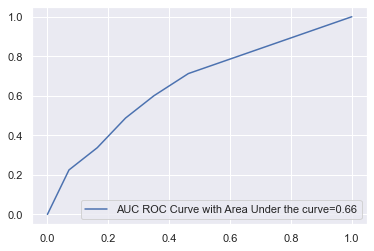

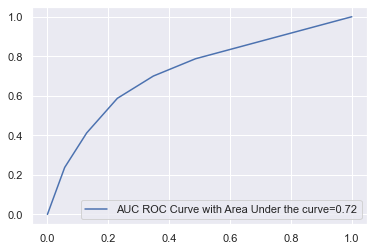

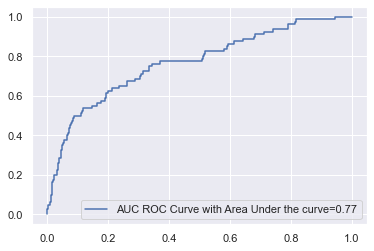

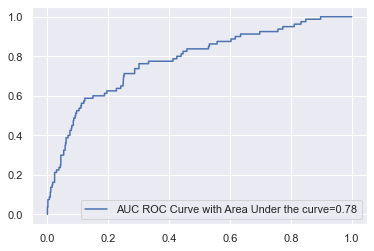

In [67]:
# plot ROC Curve to see model accuracy 

y_pred_proba = KNN_Classifier1.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label='AUC ROC Curve with Area Under the curve=%0.2f'%auc)
plt.legend(loc=4)
plt.show()


y_pred_proba = KNN_Classifier2.predict_proba(X_test2)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label='AUC ROC Curve with Area Under the curve=%0.2f'%auc)
plt.legend(loc=4)
plt.show()


y_pred_proba = svc3.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label='AUC ROC Curve with Area Under the curve=%0.2f'%auc)
plt.legend(loc=4)
plt.show()


y_pred_proba = svc4.predict_proba(X_test2)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label='AUC ROC Curve with Area Under the curve=%0.2f'%auc)
plt.legend(loc=4)
plt.show()

From the AUC ROC Curve, We can see model4 also has the  highest accuracy which is 0.78, and model1 has the lowest accuracy which is 0.66

#### model evaluation Summery:

Our main purpose is predicting whether or not a given mortgage loan application is likely to be approved or denied. In this case, we check the how many people get mortage loan, so we focuse on measuring the proportion of actual positive that is correctly identified. Therefore, the recall is our main matrics. For the recall, the model3 has the highest value 0.65 and model4 has a closer value 0.64. However, our model4 has fewer features comparing to model3 which means model4 is not complicated as model3, so for the recall, our best choice is model4. 

For our ROC curve, our model4 also has the highest value 0.78. SO we will choose model4 as our best performed model.

### Step7: Interpret best model 
>1. Test our model performance with the test dataset
2. Compare the best model in the last assignment7

#### 7.1 we choose the model4 as our best model. It's Supported vector Machine model which has the accuracy 0.75

In [68]:
#apply the selected model to the training set and compare the outcomes of the actual values and the predicted ones

# generate class probabilities
probs4 = svc4.predict_proba(X_test2)
probs4

array([[0.37, 0.63],
       [0.02, 0.98],
       [0.73, 0.27],
       ...,
       [0.31, 0.69],
       [0.03, 0.97],
       [0.36, 0.64]])


We see that the selected model is getting values that are distributed similarly, however the model seems to have a bit more applications that got denied over those that are not denied than before.

Text(0.5, 1.0, 'Deny predicted in testing set')

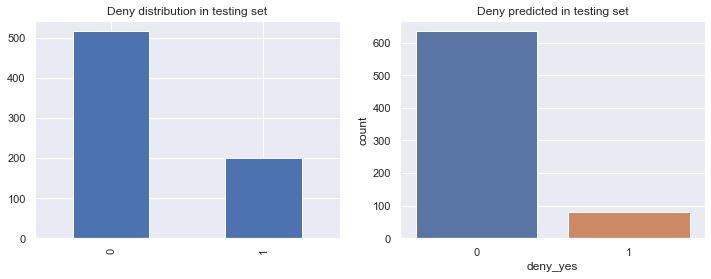

In [69]:
#plot distribution of predicted values and actual test values seperately to see the model perfrmance 
y_pred = pd.DataFrame(pred_test4, columns = ['deny'])

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
y_pred['deny'].value_counts().plot(kind='bar');
plt.title('Deny distribution in testing set')

plt.subplot(1,2,2)

sns.countplot(x=y_test["deny_yes"], data=y_test)
#y_test['deny'].value_counts().plot(kind='bar');
plt.title('Deny predicted in testing set')

From the plots above, we can see that they do have some distinct differences. Our model predicts less 'deny' than the actual 'deny'. But since our null error in this dataset is 0.5 after we use the SMOTE, and our accuracy(0.75) is higher. So our model still works well.

#### 7.2 Compare the selected best model4 with the best model we did in the last assignment7
In assignment7, We choose model03 as our best model which is LogisticRegression and has features: ['dir','lvr', 'ccs' , 'pbcr_yes', 'dmi_yes','black_yes'] without fix the imbalance.


In [70]:
# review the best model03 in assignment7 

columns=['dir','lvr', 'ccs' , 'pbcr_yes', 'dmi_yes','black_yes']

# Build a model on ALL 15 features.
# Instantiate model
model03 = LogisticRegression()

X_train03 = X_train[columns]
X_test03 = X_test[columns]
model03.fit(X_train03, y_train)
# fit the model using 10-fold cross validation
scores03 = cross_val_score(model03, X_train03, y_train, cv=10)

# predict class labels for the test set
predicted03 = model03.predict(X_test03)

# calculate the average accuracy across all 10 folds
print('Mean Accuracy:', np.mean(scores03))

Mean Accuracy: 0.902189596710194


C:\Users\13750\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\13750\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\13750\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\13750\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

Text(0.5, 1.0, 'Deny predicted in testing set')

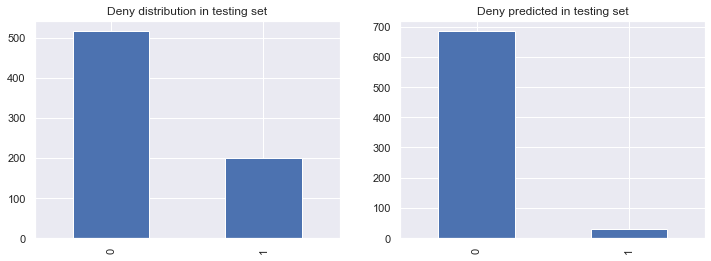

In [71]:
#plot distribution of predicted values and actual test values seperately to see the model perfrmance 
y_pred = pd.DataFrame(pred_test4, columns = ['deny'])
y_test03 = pd.DataFrame(predicted03, columns = ['deny'])

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
y_pred['deny'].value_counts().plot(kind='bar');
plt.title('Deny distribution in testing set')

plt.subplot(1,2,2)
y_test03['deny'].value_counts().plot(kind='bar');
plt.title('Deny predicted in testing set')

From the plot, we can see that our Logisticregression modelo3 has more differences with our actual test dataset. This model03 predicts very few "deny" which maybe 20.
So comparing this distribution with our best SVM model4, our SVM model4 is better than the logistic regression model to predict test data.

# Conclusion:
##### 1. Exploratory Data Analysis:
 
 By previous EDA works, we find that this dataset is am imbalanced dataset, 88% are not denied the mortgage loan. So, we decide to utilize the SMOTE algorithm to make the response variable in balance. In addition, we use standard deviation to define the outliers. There are around 200 outliers in the dataset. However, consider all the outliers in each column are meaningful and our dataset is not large enough, we do not drop any outliers expect the row 2380 contains two missing values and two outliers.

##### 2. Feature Selection
 We discover the best features are 10, including 'dir', 'lvr', 'ccs', 'mcs', 'uria', 'comdominiom', 'pbcr_yes', 'dmi_yes', 'single_yes', 'black_yes'. We want to see the performance of models' differences between all variables and the 10 best variables. And there are a total of 12 explanatory variables in the dataset. Therefore, we use all features to build model 01 and 03. Compare to that, we use the 10 best features to create the model 02 and 04.

##### 3.  Model Eveluation:
 
 According to the recall metric and ROC, we believe that the model 04 which is SVM model and contains features 'dir', 'lvr', 'ccs', 'mcs', 'uria', 'comdominiom', 'pbcr_yes', 'dmi_yes', 'single_yes', 'black_yes' is the best model to predict the mortage deny. 
    

From the coefficient correlation, we can see that the lvr is more correlated to "deny"  which mean when your ratio of size of loan to assessed value of property is higher you are more likely to be denied for the mortage. This does make sense.